<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Ejercicio_CLASE_02_Distribucion_binomial_y_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos Librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

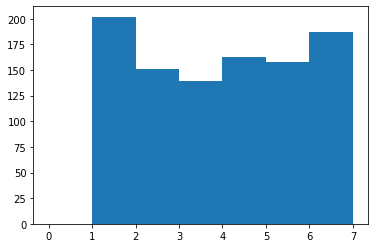

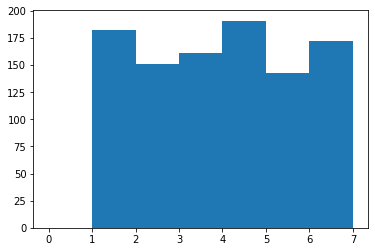

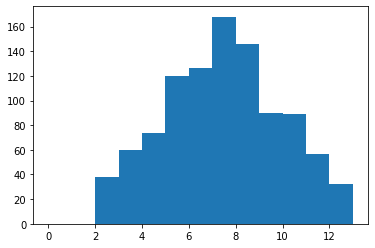

In [ ]:
#Lanzar 2 dados y sumar
n = 1000
min = 1
max = 7

dado1 = np.random.randint(min, max, n)
dado2 = np.random.randint(min, max,n)
sumadados = dado1+dado2
#print(dado1)
#print(dado2)
#print(sumadados)

#graficar histograma con datos muestra
plt.hist(dado2, range(0, 8, 1), density=True)
plt.show()

#graficar histograma con datos muestra
plt.hist(dado2, range(0, 8, 1))
plt.show()

#graficar histograma con datos muestra
plt.hist(sumadados, range(0, 14, 1))
plt.show()

In [ ]:
#qué observa al aumentar la cantidad de veces que se lanzan los dados?
#qué observa con la suma de 2 dados?


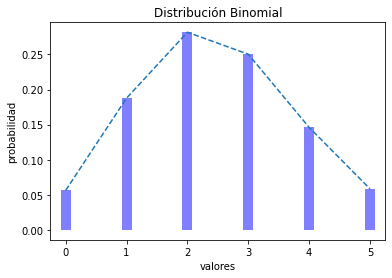

cero correcta: 0.056313514709472684
una correctas: 0.18771171569824247
dos correctas: 0.28156757354736334
tres correctas: 0.2502822875976565
prob 4 o mas:  0.22412490844726562
entre 4 y 6: 0.2206192016601565
diez correctas:  9.5367431640625e-07
prob 2 o menos:  0.5255928039550781


In [ ]:
#Ejemplo Distribucion Binomial

n = 10
p = 0.25 #uno de cuatro


#Graficar funcion de probabilidad utilizando SCIPY
binomial = stats.binom(n, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=10, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()



#ahora calcular la probabilidad de que 0 preguntas sean correctas
#prob puntuales
cero = stats.binom(n, p).pmf(0) 

una = stats.binom(n, p).pmf(1)
dos = stats.binom(n, p).pmf(2)
tres = stats.binom(n, p).pmf(3)
print('cero correcta:', cero)
print('una correctas:', una)
print('dos correctas:', dos)
print('tres correctas:', tres)


#calcular prob al menos 4 correctas
#usar la funcion de dist. acumulada:  .cdf
prob_4_o_mas = 1 - stats.binom(n, p).cdf(3)
print('prob 4 o mas: ', prob_4_o_mas)

#calcular prob entre 4 y 6
#usar prob puntuales
cuatro = stats.binom(n, p).pmf(4)
cinco = stats.binom(n, p).pmf(5)
seis = stats.binom(n, p).pmf(6)
print('entre 4 y 6:', cuatro + cinco + seis)

#calcular prob 10 correctas
#usar prob puntuales
diez = stats.binom(n, p).pmf(10)
print('diez correctas: ',diez)

#calcular prob menos de 3 correctas
#usar la funcion de dist. acumulada:  .cdf
prob_2_o_menos = stats.binom(n, p).cdf(2)
print('prob 2 o menos: ', prob_2_o_menos)


 





In [ ]:
#cargar la data de estudio (100 clientes)
centro = (19707,	12136,	16181,	21894,	17170,	14183,	8608,	17439,	19933,	18509,	10778,	19901,	7323,	19778,	19458,	17000,	15851,	21139,	22619,	17356,	21590,	14385,	10250,	17886,	23411,	11725,	18272,	18407,	15956,	12441,	18721,	16561,	15468,	19903,	29031,	11777,	14083,	10815,	9110)

norte = (22228,	20136,	24760,	19693,	20957,	23123,	21690,	17370,	20700,	21155,	20153,	22482,	21272,	22254,	22365,	21497,	21575,	23929,	20805,	24765,	18492,	20520,	24037,	22000,	25362,	21782,	24100,	15150,	22049,	24982,	22263,	23793,	28865,	28698,	25114,	27724)

sur = (20275,	30072,	24883,	24092,	28462,	26240,	24796,	26044,	29736,	25032,	24964,	27502,	24384,	23188,	25823,	26535,	29519,	28454,	31021,	34607,	34272,	29477,	31521,	26633,	30714)


In [ ]:
#Crear variable facturacion mensual de los 100 clientes
facturacion = (centro + norte + sur)


#Calcular estadísticos de la muestra

muestra = np.size(facturacion)
media = np.mean(facturacion)
desv_std = np.std(facturacion, ddof=1)
mediana = np.median(facturacion)
mediana2 = np.percentile(facturacion, 50) #otra forma es utilizar percentiles

print('media: ',media)
print('mediana: ', mediana)
print('mediana: ', mediana2)
print('desv std: ', desv_std)


media:  21428.41
mediana:  21640.0
mediana:  21640.0
desv std:  5733.673411504878


Para comprobar si los datos de nuestra población o muestra siguen una distribución normal, utilizaremos un test de normalidad denominado Anderson-Darling, el cual evalúa la hipótesis (y su correspondiente hipótesis nula) de que los datos siguen una distribuión normal:

H 0  :: los datos siguen una distribución normal

H 1  :: los datos NO siguen una distribución normal

Si el valor arrojado (Test estadístico de Anderson-Darling) es menor al valor crítico dado para un cierto nivel de significanci (por ejemplo = 5%), se acepta la hipótesis H 0, los datos tienen una distribución normal.

In [ ]:
#comprobar normalidad de los datos
stats.anderson(facturacion, dist='norm')


AndersonResult(statistic=0.3435597944355493, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

En este caso en valor arrojado es 0,34355, el cual es menor al 0,759 para un nivel de significancia del 5%. Por tanto aceptamos la hipotesis de que los datos siguen una distribución normal.

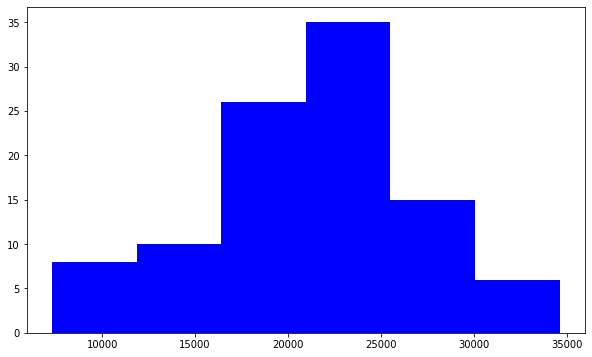

In [ ]:
#graficar histograma con datos muestra
plt.figure(figsize=(10, 6)) #tamaño grafico
plt.hist(facturacion, 6, density=False, cumulative=False, color='b') #con 6 clases y color azul
plt.show()

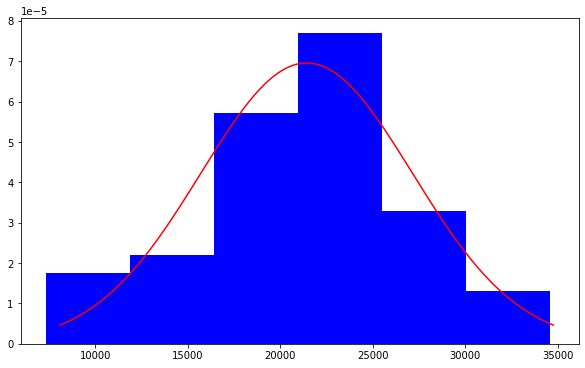

In [ ]:
#crear proyeccion poblacion
mu = media
sigma = desv_std

poblacion = stats.norm(mu, sigma)
x = np.arange(poblacion.ppf(0.01),poblacion.ppf(0.99))

plt.figure(figsize=(10, 6)) #tamaño grafico
plt.plot(x,poblacion.pdf(x),"r")
plt.hist(facturacion, 6, density=True, cumulative=False, color='b') #con 6 clases, color azul y frec. relativa
plt.show()

<function matplotlib.pyplot.show>

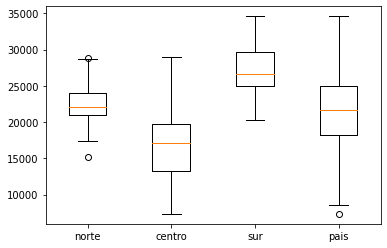

In [ ]:
#gráfico box plot por zonas
data= (norte, centro, sur, facturacion)
labels = ("norte", "centro", "sur", "pais")
plt.boxplot(data, labels=labels)
plt.show


#calcular estadisticos (media y desv. std)


In [ ]:
#contar la cantidad de clientes en muestra que gasta al menos $30.000
count = sum(map(lambda x : x>=30000, facturacion))

print(count)

6


In [ ]:
#Proyectar clientes que pertenecen a "Premium"

#Primera forma con Numpy y Scipy
x = 30000 # Valor al que queremos calcular su probabilidad acumulada
mu = np.mean(facturacion) 
sigma = np.std(facturacion)

Z = (x - mu) / sigma

prob30k = stats.norm.cdf(Z) # Probabilidad acumulada de infinito negativo al valor buscado
print('probabilidad de ser Premium: ', (1 - prob30k)) #se busca el complemento

#Otra forma sin aplicar Z, es usar libreria Scipy
prob30k_b = stats.norm(mu, sigma).cdf(x)
print('otra forma: ',1-prob30k_b)


probabilidad de ser Premium:  0.06648563911127958
otra forma:  0.06648563911127958


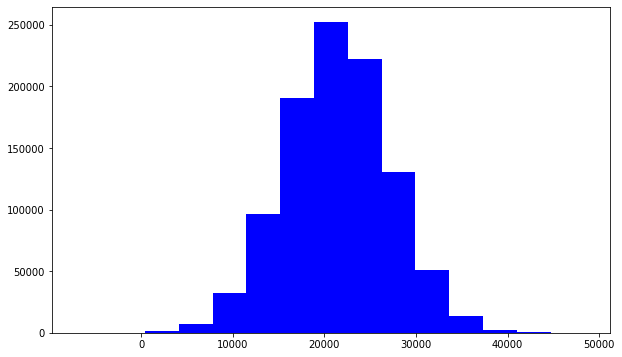

In [ ]:
#Tip sobre como crear distribuciones
poblacion_simulada = np.random.RandomState(seed=2).normal(mu, sigma, 1000000)

plt.figure(figsize=(10, 6)) #tamaño grafico
plt.hist(poblacion_simulada, 15, density=False, cumulative=False, color='b') #con 15 clases y color azul
plt.show()